# System of Equations Example - SIR Epidemic Model
## CH EN 2450 - Numerical Methods
**Prof. Tony Saad (<a>www.tsaad.net</a>) <br/>Department of Chemical Engineering <br/>University of Utah**
<hr/>

In [8]:
import numpy as np
from numpy import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# The SIR Model for Epidemics

The SIR model for epidemics consists of three ODEs
\begin{equation}
\frac{\text{d}S}{\text{d}t} = -\beta I S
\end{equation}
\begin{equation}
\frac{\text{d}I}{\text{d}t} = \beta I S - \gamma I
\end{equation}
\begin{equation}
\frac{\text{d}R}{\text{d}t} =  \gamma I
\end{equation}

We can convert thissystem into a vector system of equations:
<div>
<img src="Screenshot 2022-04-12 145601.png" width="300"/>
</div>

In [5]:
def rhs_sir(PHI_, t_, β_, γ_, N_):
    # PHI is the vector of dependent variables containing the 3 dependent vars: PHI=[S,I,R]
    S = PHI_[0]
    I = PHI_[1]
    R = PHI_[2]
    dSdt = -β_/N_ * S * I
    dIdt = β_/N_ * S * I - γ_ * I
    dRdt = γ_ * I
    # you must return the RHS in a consistent order with PHI - rhs0 corresponds to phi0, etc...
    return [dSdt, dIdt, dRdt]

### Define known variables

In [22]:
N  = 3e3 # total population
I0 = 10 # 10 sick individuals
R0 = 0 # 0 people recovered
S0 = N - I0 # we need to conserve the total population
β  = 0.6
γ  = 1/20.0

# Initial conditions vector
y0 = [S0, I0, R0]

# time array
num_days = 100 # days
t = np.linspace(0,num_days,int(num_days))

### Integrate
<div>
<img src="Screenshot 2022-04-12 145918.png" width="450"/>
</div>

In [25]:
sol = odeint(rhs_sir, y0, t, args=(β, γ, N))
S, I, R = sol[:, 0], sol[:, 1], sol[:, 2]

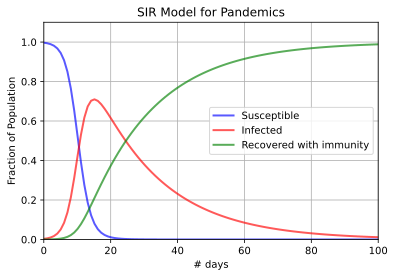

In [26]:
plt.plot(t, S/N, 'b', alpha=0.65, lw=2, label='Susceptible')
plt.plot(t, I/N, 'r', alpha=0.65, lw=2, label='Infected')
plt.plot(t, R/N, 'g', alpha=0.65, lw=2, label='Recovered with immunity')
plt.xlabel('# days')
plt.ylabel('Fraction of Population')
plt.xlim(0,num_days)
plt.ylim(0,1.1)
plt.legend()
plt.title('SIR Model for Pandemics')
plt.grid()
plt.show()

# Interactive Simulation

In [28]:
def plot_sir(β,days,tend,semilogy=False):
    N = 10 # total population
    I0 = 1 # 10 sick individuals
    R0 = 0 # 0 people recovered
    S0 = N - I0 # we need to conserve the total population
    tend = tend*30 # tend is given in months
    t = np.linspace(0,tend,int(tend))
    γ = 1.0/days
    # Initial conditions vector
    y0 = [S0, I0, R0]
    # Integrate the SIR equations over the time grid, t.
    sol = odeint(rhs_sir, y0, t, args=(β, γ, N))
    [S, I, R] = sol.T
    
    f = plt.plot
    if (semilogy):
        f =plt.semilogy
    f(t/30, S, 'b', alpha=0.65, lw=2, label='Susceptible')
    f(t/30, I, 'r', alpha=0.65, lw=2, label='Infected')
    f(t/30, R, 'g', alpha=0.65, lw=2, label='Recovered')
    plt.xlabel('# months since outbreak')
    plt.ylabel('# Population (1000s)')
#     plt.xlim(0,tend/30)
    plt.ylim(bottom=1e-4)
    plt.legend()
    plt.title('SIR Model for Epidemics')
    plt.grid()
    # plt.savefig('SIR model.pdf')
    # plt.show()
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
style = {'description_width': 'initial'}
β = widgets.FloatSlider(value=0.143,min=0.001,max=1,step=0.001,description='$\\beta$:',continuous_update=False)
days = widgets.FloatSlider(value=14,min=1,max=24,step=0.1, description='Recovery (days):' ,style=style,continuous_update=False)
tend = widgets.FloatSlider(value=12,min=1,max=32,step=0.5, description='Simulation Time (months):',style=style,continuous_update=False)
semilogy = widgets.Checkbox(value=False,description='semilogy plot', style=style)
ui1 = widgets.HBox([β,days])
ui2 = widgets.HBox([tend,semilogy])
out = widgets.interactive_output(plot_sir, {'β': β, 'days': days, 'tend': tend, 'semilogy':semilogy})

display(ui1,ui2, out)

Output()